In [10]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [11]:
# Import data
data = pd.read_csv("data.csv",sep=";")
data['date'] = pd.to_datetime(data['date'])  # First, ensure that "date" is in datetime format
data.head()

,permno,date,Rn,shrout,prc,mcap,mcap_l,rf,Rm,const,Rn_e,Rm_e,w_m,N
0,10001,2009-12-31,0.162621,4361.0,10.3000,44918.3000,43871.6600,0.000032,0.028475,1,0.162589,0.028443,0.000005,91
1,10001,2010-01-29,-0.018932,4361.0,10.0600,43871.6600,43646.6324,0.000013,-0.037172,1,-0.018945,-0.037185,0.000005,91
2,10001,2010-02-26,-0.000656,4361.0,10.0084,43646.6324,44351.3700,0.000061,0.034744,1,-0.000717,0.034683,0.000004,91
3,10001,2010-03-31,0.020643,4361.0,10.1700,44351.3700,69137.3000,0.000112,0.063668,1,0.020531,0.063556,0.000007,91
4,10001,2010-04-30,0.124385,6070.0,11.3900,69137.3000,69209.4000,0.000118,0.020036,1,0.124267,0.019918,0.000007,91


# 1.1 Construct Momentum Strategy

Cumulative 12 month past return for each stock:

In [12]:
data=data.sort_values(['permno','date']).reset_index(drop=True)
data['LN_Cret12'] = data.groupby('permno').apply(lambda x: np.log(x.Rn+1).rolling(11,closed='left').sum()).values
data.head(13)

/var/folders/s3/w3_938yj6mb4c7_8trrtc56h0000gn/T/ipykernel_6406/240351223.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['LN_Cret12'] = data.groupby('permno').apply(lambda x: np.log(x.Rn+1).rolling(11,closed='left').sum()).values


,permno,date,Rn,shrout,prc,mcap,mcap_l,rf,Rm,const,Rn_e,Rm_e,w_m,N,LN_Cret12
0,10001,2009-12-31,0.162621,4361.0,10.3000,44918.3000,43871.6600,0.000032,0.028475,1,0.162589,0.028443,0.000005,91,NaN
1,10001,2010-01-29,-0.018932,4361.0,10.0600,43871.6600,43646.6324,0.000013,-0.037172,1,-0.018945,-0.037185,0.000005,91,NaN
2,10001,2010-02-26,-0.000656,4361.0,10.0084,43646.6324,44351.3700,0.000061,0.034744,1,-0.000717,0.034683,0.000004,91,NaN
3,10001,2010-03-31,0.020643,4361.0,10.1700,44351.3700,69137.3000,0.000112,0.063668,1,0.020531,0.063556,0.000007,91,NaN
4,10001,2010-04-30,0.124385,6070.0,11.3900,69137.3000,69209.4000,0.000118,0.020036,1,0.124267,0.019918,0.000007,91,NaN
5,10001,2010-05-28,0.004829,6071.0,11.4000,69209.4000,66028.8000,0.000114,-0.079240,1,0.004715,-0.079354,0.000007,91,NaN
6,10001,2010-07-30,0.083333,6080.0,11.7200,71257.6000,62983.0830,0.000118,0.070360,1,0.083215,0.070242,0.000007,91,NaN
7,10001,2010-08-31,-0.111263,6073.0,10.3710,62983.0830,67531.7600,0.000127,-0.042864,1,-0.111390,-0.042991,0.000007,91,NaN
8,10001,2010-09-30,0.076560,6073.0,11.1200,67531.7600,69485.9526,0.000112,0.091628,1,0.076448,0.091516,0.000007,91,NaN
9,10001,2010-10-29,0.032815,6074.0,11.4399,69485.9526,78653.3600,0.000106,0.038592,1,0.032709,0.038486,0.000008,91,NaN


In [13]:
q = 10
data['Momentum'] = data.groupby('date')['LN_Cret12'].transform(lambda x: pd.qcut(x,q,labels=False, duplicates='drop'))
data['w_L'] = (data['Momentum']==q-1)*data['mcap']
data['w_S'] = (data['Momentum']==0)*data['mcap']
data['w_L'] = data['w_L']/data.groupby(['date'])['w_L'].transform('sum')
data['w_S'] = data['w_S']/data.groupby(['date'])['w_S'].transform('sum')
data['w_Mom'] = data['w_L'] - data['w_S']
Momentum = data.groupby('date').apply(lambda x: np.sum(x['Rn_e']*x['w_Mom'])).reset_index()
Momentum['date'] =  Momentum['date'] + pd.DateOffset(months=1)
Momentum.columns = ['date','Mom_ret']

/var/folders/s3/w3_938yj6mb4c7_8trrtc56h0000gn/T/ipykernel_6406/2517823613.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Momentum = data.groupby('date').apply(lambda x: np.sum(x['Rn_e']*x['w_Mom'])).reset_index()


Momentum Return Annualized:  -0.012267071345550957
Momentum Std Annualized:  0.3293308371444831
Momentum Sharpe:  -0.0372484746703789


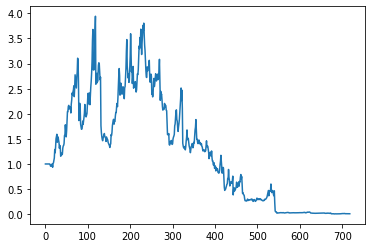

In [14]:
start = '1980-01-01'
print('Momentum Return Annualized: ', (Momentum['Mom_ret'].mean()*12))
print('Momentum Std Annualized: ',Momentum['Mom_ret'].std()*np.sqrt(12))
print('Momentum Sharpe: ',Momentum['Mom_ret'].mean()/Momentum['Mom_ret'].std()*np.sqrt(12))
plt.plot((Momentum['Mom_ret']+1).cumprod())

/var/folders/s3/w3_938yj6mb4c7_8trrtc56h0000gn/T/ipykernel_6406/231551720.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Momentum_vw = data.groupby('date').apply(lambda x: np.sum(x['Rn_e']*x['w_Mom_vw'])).reset_index(name='Mom_ret_vw')


=== Value-Weighted MOM ===
MOM VW Return Annualized: -0.0144
MOM VW Std Annualized: 0.1874
MOM VW Sharpe: -0.0767
MOM VW t-stat: -0.5936, p-value: 0.5529

=== Equal-Weighted MOM ===
MOM EQ Return Annualized: 0.0154
MOM EQ Std Annualized: 0.1781
MOM EQ Sharpe: 0.0864
MOM EQ t-stat: 0.6685, p-value: 0.5040



/var/folders/s3/w3_938yj6mb4c7_8trrtc56h0000gn/T/ipykernel_6406/231551720.py:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Momentum_eq = data.groupby('date').apply(lambda x: np.sum(x['Rn_e']*x['w_Mom_eq'])).reset_index(name='Mom_ret_eq')


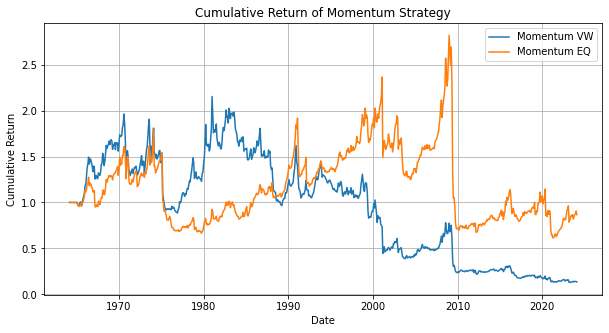

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp

q = 10

# 1️⃣ Déciles momentum (cumulative 11 mois passés)
data['Momentum'] = data.groupby('date')['LN_Cret12'].transform(
    lambda x: pd.qcut(x, q, labels=False, duplicates='drop')
)

# 2️⃣ Poids value-weighted pour long (top 3 déciles) et short (bottom 3 déciles)
data['w_L_vw'] = data['mcap'] * data['Momentum'].isin([7,8,9])
data['w_S_vw'] = data['mcap'] * data['Momentum'].isin([0,1,2])
data['w_L_vw'] /= data.groupby('date')['w_L_vw'].transform('sum')
data['w_S_vw'] /= data.groupby('date')['w_S_vw'].transform('sum')

# Poids equal-weighted
data['w_L_eq'] = (data['Momentum'].isin([7,8,9])).astype(float)
data['w_S_eq'] = (data['Momentum'].isin([0,1,2])).astype(float)
data['w_L_eq'] /= data.groupby('date')['w_L_eq'].transform('sum')
data['w_S_eq'] /= data.groupby('date')['w_S_eq'].transform('sum')

# 3️⃣ Long-short weights
data['w_Mom_vw'] = data['w_L_vw'] - data['w_S_vw']
data['w_Mom_eq'] = data['w_L_eq'] - data['w_S_eq']

# 4️⃣ Portefeuille long-short MOM : value-weighted
Momentum_vw = data.groupby('date').apply(lambda x: np.sum(x['Rn_e']*x['w_Mom_vw'])).reset_index(name='Mom_ret_vw')
Momentum_vw['date'] += pd.DateOffset(months=1)

# 5️⃣ Portefeuille long-short MOM : equal-weighted
Momentum_eq = data.groupby('date').apply(lambda x: np.sum(x['Rn_e']*x['w_Mom_eq'])).reset_index(name='Mom_ret_eq')
Momentum_eq['date'] += pd.DateOffset(months=1)

# 6️⃣ Stats et plots
def compute_stats(MOM, label='Momentum'):
    mean_ann = MOM.mean()*12
    std_ann = MOM.std()*np.sqrt(12)
    sharpe_ann = mean_ann/std_ann
    t_stat, p_value = ttest_1samp(MOM, 0)
    print(f"{label} Return Annualized: {mean_ann:.4f}")
    print(f"{label} Std Annualized: {std_ann:.4f}")
    print(f"{label} Sharpe: {sharpe_ann:.4f}")
    print(f"{label} t-stat: {t_stat:.4f}, p-value: {p_value:.4f}\n")
    return mean_ann, std_ann, sharpe_ann

print("=== Value-Weighted MOM ===")
compute_stats(Momentum_vw['Mom_ret_vw'], 'MOM VW')

print("=== Equal-Weighted MOM ===")
compute_stats(Momentum_eq['Mom_ret_eq'], 'MOM EQ')

# 7️⃣ Cumulative returns plot
plt.figure(figsize=(10,5))
plt.plot((Momentum_vw.set_index('date')['Mom_ret_vw']+1).cumprod(), label='Momentum VW')
plt.plot((Momentum_eq.set_index('date')['Mom_ret_eq']+1).cumprod(), label='Momentum EQ')
plt.title('Cumulative Return of Momentum Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()


=== Value-Weighted MOM (1980-2000) ===
MOM VW Return Annualized: -0.0301
MOM VW Std Annualized: 0.1908
MOM VW Sharpe: -0.1578
MOM VW t-stat: -0.9853, p-value: 0.3250

=== Equal-Weighted MOM (1980-2000) ===
MOM EQ Return Annualized: 0.0225
MOM EQ Std Annualized: 0.1704
MOM EQ Sharpe: 0.1318
MOM EQ t-stat: 0.8229, p-value: 0.4110



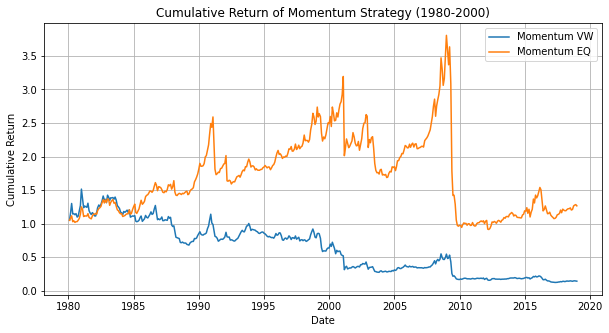

In [16]:
# Filtrer la période 1980-2000
start = '1980-01-01'
end = '2018-12-31'

Momentum_vw_period = Momentum_vw[(Momentum_vw['date'] >= start) & (Momentum_vw['date'] <= end)].copy()
Momentum_eq_period = Momentum_eq[(Momentum_eq['date'] >= start) & (Momentum_eq['date'] <= end)].copy()

# Stats pour cette période
print("=== Value-Weighted MOM (1980-2000) ===")
compute_stats(Momentum_vw_period['Mom_ret_vw'], 'MOM VW')

print("=== Equal-Weighted MOM (1980-2000) ===")
compute_stats(Momentum_eq_period['Mom_ret_eq'], 'MOM EQ')

# Cumulative returns plot
plt.figure(figsize=(10,5))
plt.plot((Momentum_vw_period.set_index('date')['Mom_ret_vw'] + 1).cumprod(), label='Momentum VW')
plt.plot((Momentum_eq_period.set_index('date')['Mom_ret_eq'] + 1).cumprod(), label='Momentum EQ')
plt.title('Cumulative Return of Momentum Strategy (1980-2000)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.legend()
plt.show()


Very naive momentum factor resulting in poor result, sharpe ratio and annualized alpha not really significant. Momentum factor is also really affected by crisis such as Covid 19. We won't consider it for the optimal strat